In [60]:
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm 
from datetime import  datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [61]:
# Set the directory
#Run this first for OPI cleaning
# OPI CLEANING AND AVERAGING
#path = Path('U:') / 'Opi system file' / 'SQL database'/ 'New Data Processing'
path = Path('W:') / 'Amber Ag' / 'ASABE 2022'/'OPI_raw'

In [62]:
# Original file name
# filename = path / 'PHERC RAW BIN13.xls'
# _B13 = path / 'PHERC 11May2021.xls'
filename = path / 'Pherc raw 22Nov2021.xls'

In [129]:
# Load file into Pandas data frame
#filename = path / 'Bin13_clean_data.xlsx'
#df = pd.read_excel(filename, sheet_name = 'Sheet1')
df = pd.read_excel(filename, sheet_name = '_B16')
df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:24:05.000000,73.50\t-100.00\t-100.00\t-100.00\t-100.00\r\n,64.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,69.98\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,73.500000,64.400002,9.1,69.980003,9.10,...,35.60\t37.10\t38.40\t39.50\t40.50\t41.90\t43.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00.000000,62.60\t61.90\t61.60\t-99.90\t62.90\r\n,58.30\t58.40\t58.00\t-99.90\t58.60\r\n,61.04\t60.26\t59.81\t-99.90\t60.75\r\n,NaN,62.900002,58.000000,4.9,60.480000,4.90,...,47.80\t49.20\t49.80\t50.80\t51.40\t52.60\t54.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00.000000,55.30\t54.30\t54.40\t-99.90\t54.50\r\n,53.20\t53.20\t52.80\t-99.90\t53.00\r\n,54.47\t53.70\t53.54\t-99.90\t53.86\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,55.299999,52.799999,2.5,53.910000,2.50,...,61.20\t62.00\t62.50\t63.50\t64.70\t65.30\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:20.000000,55.00\t53.80\t54.10\t-99.90\t54.20\r\n,52.90\t53.00\t52.60\t-99.90\t52.80\r\n,54.12\t53.41\t53.24\t-99.90\t53.56\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,55.000000,52.599998,2.4,53.599998,2.40,...,62.30\t63.10\t63.40\t64.60\t65.30\t65.60\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:26:02.000000,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.50\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.10\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.500000,1.3,45.099998,1.30,...,87.90\t87.90\t87.90\t88.30\t88.50\t88.30\t88.9...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,2021-11-22 06:55:00.000000,40.30\t40.70\t40.20\t-99.90\t44.70\r\n,23.90\t23.90\t23.50\t-99.90\t24.10\r\n,32.54\t35.01\t33.09\t-99.90\t37.06\r\n,NaN,44.700001,30.000000,14.7,38.630001,15.50,.

In [130]:
def clean_time(x):
    # Remove unnecasy charactor
    timestamp_text = x[:16]
    # Convert to Python datetime variable
    timestamp = datetime.strptime(timestamp_text, '%Y-%m-%d %H:%M')
    return timestamp

In [131]:
df['OPI_DATE'] = df['OPI_DATE'].apply(lambda x: clean_time(x))

In [132]:
df['C1'] = df['C1'].apply(lambda x: x.split('\t'))
df['C2'] = df['C2'].apply(lambda x: x.split('\t'))
df['C3'] = df['C3'].apply(lambda x: x.split('\t'))
df['C4'] = df['C4'].apply(lambda x: x.split('\t'))
df['C5'] = df['C5'].apply(lambda x: x.split('\t'))

In [133]:
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:24:00,73.50\t-100.00\t-100.00\t-100.00\t-100.00\r\n,64.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,69.98\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,73.500000,64.400002,9.1,69.980003,9.10,...,35.60\t37.10\t38.40\t39.50\t40.50\t41.90\t43.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00,62.60\t61.90\t61.60\t-99.90\t62.90\r\n,58.30\t58.40\t58.00\t-99.90\t58.60\r\n,61.04\t60.26\t59.81\t-99.90\t60.75\r\n,NaN,62.900002,58.000000,4.9,60.480000,4.90,...,47.80\t49.20\t49.80\t50.80\t51.40\t52.60\t54.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00,55.30\t54.30\t54.40\t-99.90\t54.50\r\n,53.20\t53.20\t52.80\t-99.90\t53.00\r\n,54.47\t53.70\t53.54\t-99.90\t53.86\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,55.299999,52.799999,2.5,53.910000,2.50,...,61.20\t62.00\t62.50\t63.50\t64.70\t65.30\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:00,55.00\t53.80\t54.10\t-99.90\t54.20\r\n,52.90\t53.00\t52.60\t-99.90\t52.80\r\n,54.12\t53.41\t53.24\t-99.90\t53.56\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,55.000000,52.599998,2.4,53.599998,2.40,...,62.30\t63.10\t63.40\t64.60\t65.30\t65.60\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:26:00,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.50\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.10\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.500000,1.3,45.099998,1.30,...,87.90\t87.90\t87.90\t88.30\t88.50\t88.30\t88.9...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,2021-11-22 06:55:00,40.30\t40.70\t40.20\t-99.90\t44.70\r\n,23.90\t23.90\t23.50\t-99.90\t24.10\r\n,32.54\t35.01\t33.09\t-99.90\t37.06\r\n,NaN,44.700001,30.000000,14.7,38.630001,15.50,...,83.10\t83.10\t83.00\t80.00\t67.40\t65.0

In [64]:
# def average_first3(xs):
#     total = 0
#     count = 0
#     for x in xs[:3]:
#         if x != 'NaN' and float(x) > -32:
#             total += float(x)
#             count += 1
#     if count > 0:
#         return  total / count
#     else:
#         return np.nan

In [134]:
# USE THIS CODE FOR SENSOR 6789 AVERAGE

def average_first6789(xs):
    total = 0
    count = 0
    for x in xs[7:9]:
        if x != 'NaN' and float(x) > -32:
            total += float(x)
            count += 1
    if count > 0:
        return  total / count
    else:
        return np.nan

In [135]:
clean_df = df[['OPI_DATE']].copy()
clean_df

,OPI_DATE
0,2020-10-28 15:24:00
1,2020-10-28 16:08:00
2,2020-10-28 17:08:00
3,2020-10-28 17:11:00
4,2020-10-28 19:26:00
...,...
8515,2021-11-22 06:55:00
8516,2021-11-22 07:55:00
8517,2021-11-22 08:55:00
8518,2021-11-22 09:55:00


In [136]:
clean_df['C1s-avg'] = df['C1'].apply(lambda x: average_first6789(x)) 
clean_df['C2s-avg'] = df['C2'].apply(lambda x: average_first6789(x)) 
clean_df['C3s-avg'] = df['C3'].apply(lambda x: average_first6789(x)) 
clean_df['C4s-avg'] = df['C4'].apply(lambda x: average_first6789(x)) 
clean_df['C5s-avg'] = df['C5'].apply(lambda x: average_first6789(x)) 

In [137]:
df['RH1'] = df['RH1'].apply(lambda x: x.split('\t'))
# df['RH2'] = df['RH2'].apply(lambda x: x.split('\t'))
# df['RH3'] = df['RH3'].apply(lambda x: x.split('\t'))
# df['RH4'] = df['RH4'].apply(lambda x: x.split('\t'))
# df['RH5'] = df['RH5'].apply(lambda x: x.split('\t'))

In [138]:
clean_df['RH1s-avg'] = df['RH1'].apply(lambda x: average_first6789(x)) 
# clean_df['RH2s-avg'] = df['RH2'].apply(lambda x: average_first6789(x)) 
# clean_df['RH3s-avg'] = df['RH3'].apply(lambda x: average_first6789(x)) 
# clean_df['RH4s-avg'] = df['RH4'].apply(lambda x: average_first6789(x)) 
# clean_df['RH5s-avg'] = df['RH5'].apply(lambda x: average_first6789(x)) 

In [15]:
# df['MC1'] = df['MC1'].apply(lambda x: x.split('\t'))
# df['MC2'] = df['MC2'].apply(lambda x: x.split('\t'))
# df['MC3'] = df['MC3'].apply(lambda x: x.split('\t'))
# df['MC4'] = df['MC4'].apply(lambda x: x.split('\t'))
# df['MC5'] = df['MC5'].apply(lambda x: x.split('\t'))

In [16]:
# clean_df['MC1s-avg'] = df['MC1'].apply(lambda x: average_first3(x)) 
# clean_df['MC2s-avg'] = df['MC2'].apply(lambda x: average_first3(x)) 
# clean_df['MC3s-avg'] = df['MC3'].apply(lambda x: average_first3(x)) 
# clean_df['MC4s-avg'] = df['MC4'].apply(lambda x: average_first3(x)) 
# clean_df['MC5s-avg'] = df['MC5'].apply(lambda x: average_first3(x)) 

In [139]:
clean_df_excel = clean_df.copy()
clean_df_excel['OPI_DATE'] = clean_df_excel['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
##save to excel
#clean_df_excel.to_excel(path / 'OPI_Hourly_Avg_3sensors_Temp.xls', index=False)
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg
0,2020-10-28 15:24:00,65.40,NaN,NaN,NaN,NaN,47.25
1,2020-10-28 16:08:00,58.80,58.4,58.0,NaN,58.6,56.60
2,2020-10-28 17:08:00,53.50,53.3,52.8,NaN,53.0,67.10
3,2020-10-28 17:11:00,53.20,53.0,52.6,NaN,52.8,67.00
4,2020-10-28 19:26:00,44.75,NaN,NaN,NaN,NaN,88.60
...,...,...,...,...,...,...,...
8515,2021-11-22 06:55:00,37.70,40.7,32.9,NaN,44.7,71.10
8516,2021-11-22 07:55:00,37.75,40.8,32.0,NaN,44.7,71.10
8517,2021-11-22 08:55:00,37.90,40.9,31.6,NaN,44.7,71.15
8518,2021-11-22 09:55:00,38.05,41.3,33.2,NaN,44.7,71.45


In [140]:
clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2020, month=11, day=3)]
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg
126,2020-11-03 00:51:00,38.15,38.5,38.2,NaN,38.4,51.20
127,2020-11-03 01:51:00,38.15,38.6,38.3,NaN,38.4,52.90
128,2020-11-03 02:51:00,37.85,38.2,37.9,NaN,37.9,55.90
129,2020-11-03 03:51:00,36.50,37.0,36.6,NaN,36.7,59.65
130,2020-11-03 04:51:00,35.20,35.6,35.3,NaN,35.6,63.05
...,...,...,...,...,...,...,...
8515,2021-11-22 06:55:00,37.70,40.7,32.9,NaN,44.7,71.10
8516,2021-11-22 07:55:00,37.75,40.8,32.0,NaN,44.7,71.10
8517,2021-11-22 08:55:00,37.90,40.9,31.6,NaN,44.7,71.15
8518,2021-11-22 09:55:00,38.05,41.3,33.2,NaN,44.7,71.45


In [141]:
###Nighttime ~9pm to 6am
clean_df = clean_df.loc[~clean_df['OPI_DATE'].dt.hour.isin(range(6, 21))]
clean_df

####Daytime
# clean_df = clean_df.loc[clean_df['OPI_DATE'].dt.hour.isin(range(6, 20))]
# clean_df



,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg
126,2020-11-03 00:51:00,38.15,38.5,38.2,NaN,38.4,51.20
127,2020-11-03 01:51:00,38.15,38.6,38.3,NaN,38.4,52.90
128,2020-11-03 02:51:00,37.85,38.2,37.9,NaN,37.9,55.90
129,2020-11-03 03:51:00,36.50,37.0,36.6,NaN,36.7,59.65
130,2020-11-03 04:51:00,35.20,35.6,35.3,NaN,35.6,63.05
...,...,...,...,...,...,...,...
8510,2021-11-22 01:55:00,37.25,39.4,37.6,NaN,43.6,70.90
8511,2021-11-22 02:55:00,37.35,39.8,36.5,NaN,43.9,70.90
8512,2021-11-22 03:55:00,37.45,40.0,35.6,NaN,44.3,70.95
8513,2021-11-22 04:55:00,37.55,40.2,34.5,NaN,44.5,70.95


In [142]:
# average of top 3 sensors at headspace
c1 = clean_df[['OPI_DATE', 'C1s-avg']].copy()
c1 = c1.dropna()

In [143]:
# average of first 3 sensors
c2 = clean_df[['OPI_DATE', 'C2s-avg']].copy()
c2 = c2.dropna()
c2

,OPI_DATE,C2s-avg
126,2020-11-03 00:51:00,38.5
127,2020-11-03 01:51:00,38.6
128,2020-11-03 02:51:00,38.2
129,2020-11-03 03:51:00,37.0
130,2020-11-03 04:51:00,35.6
...,...,...
8510,2021-11-22 01:55:00,39.4
8511,2021-11-22 02:55:00,39.8
8512,2021-11-22 03:55:00,40.0
8513,2021-11-22 04:55:00,40.2


In [144]:
# average of first 3 sensors
c3 = clean_df[['OPI_DATE', 'C3s-avg']].copy()
c3 = c3.dropna()
c3

,OPI_DATE,C3s-avg
126,2020-11-03 00:51:00,38.2
127,2020-11-03 01:51:00,38.3
128,2020-11-03 02:51:00,37.9
129,2020-11-03 03:51:00,36.6
130,2020-11-03 04:51:00,35.3
...,...,...
8510,2021-11-22 01:55:00,37.6
8511,2021-11-22 02:55:00,36.5
8512,2021-11-22 03:55:00,35.6
8513,2021-11-22 04:55:00,34.5


In [145]:
# average of first 3 sensors
c4 = clean_df[['OPI_DATE', 'C4s-avg']].copy()
c4 = c4.dropna()
c4

,OPI_DATE,C4s-avg
1441,2021-01-09 21:32:00,36.4
1442,2021-01-09 22:32:00,36.4
1443,2021-01-09 23:32:00,36.3
1444,2021-01-10 00:32:00,36.3
1445,2021-01-10 01:32:00,36.2
...,...,...
4840,2021-06-17 05:56:00,57.8
4906,2021-06-20 21:00:00,81.5
4907,2021-06-20 22:00:00,81.8
4908,2021-06-20 23:00:00,82.3


In [146]:
# average of first 3 sensors
c5 = clean_df[['OPI_DATE', 'C5s-avg']].copy()
c5 = c5.dropna()
c5

,OPI_DATE,C5s-avg
126,2020-11-03 00:51:00,38.4
127,2020-11-03 01:51:00,38.4
128,2020-11-03 02:51:00,37.9
129,2020-11-03 03:51:00,36.7
130,2020-11-03 04:51:00,35.6
...,...,...
8510,2021-11-22 01:55:00,43.6
8511,2021-11-22 02:55:00,43.9
8512,2021-11-22 03:55:00,44.3
8513,2021-11-22 04:55:00,44.5


In [147]:
RH1 = clean_df[['OPI_DATE', 'RH1s-avg']].copy()
RH1 = RH1.dropna()
RH1

,OPI_DATE,RH1s-avg
126,2020-11-03 00:51:00,51.20
127,2020-11-03 01:51:00,52.90
128,2020-11-03 02:51:00,55.90
129,2020-11-03 03:51:00,59.65
130,2020-11-03 04:51:00,63.05
...,...,...
8510,2021-11-22 01:55:00,70.90
8511,2021-11-22 02:55:00,70.90
8512,2021-11-22 03:55:00,70.95
8513,2021-11-22 04:55:00,70.95


In [148]:
# create dataframe to save
# create new df
to_be_save_df = c1[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['C1_Avg_3_sensors'] = c1[['C1s-avg']].copy()
to_be_save_df['C2_Avg_3_sensors'] = c2[['C2s-avg']].copy()
to_be_save_df['C3_Avg_3_sensors'] = c3[['C3s-avg']].copy()
to_be_save_df['C4_Avg_3_sensors'] = c4[['C4s-avg']].copy()
to_be_save_df['C5_Avg_3_sensors'] = c5[['C5s-avg']].copy()
to_be_save_df['RH1_Avg_3_sensors'] = RH1[['RH1s-avg']].copy()

# #saving the 3 avg sensors (hourly)
#to_be_save_df.to_csv(path / 'OPI_Nighttime_B8_avg_hourly_HP_temP_RH_for_3sensors.csv')
to_be_save_df

,OPI_DATE,C1_Avg_3_sensors,C2_Avg_3_sensors,C3_Avg_3_sensors,C4_Avg_3_sensors,C5_Avg_3_sensors,RH1_Avg_3_sensors
126,11/03/2020 12:51 AM,38.15,38.5,38.2,NaN,38.4,51.20
127,11/03/2020 01:51 AM,38.15,38.6,38.3,NaN,38.4,52.90
128,11/03/2020 02:51 AM,37.85,38.2,37.9,NaN,37.9,55.90
129,11/03/2020 03:51 AM,36.50,37.0,36.6,NaN,36.7,59.65
130,11/03/2020 04:51 AM,35.20,35.6,35.3,NaN,35.6,63.05
...,...,...,...,...,...,...,...
8510,11/22/2021 01:55 AM,37.25,39.4,37.6,NaN,43.6,70.90
8511,11/22/2021 02:55 AM,37.35,39.8,36.5,NaN,43.9,70.90
8512,11/22/2021 03:55 AM,37.45,40.0,35.6,NaN,44.3,70.95
8513,11/22/2021 04:55 AM,37.55,40.2,34.5,NaN,44.5,70.95


In [149]:
# Moving average Nighttime
temp2 = to_be_save_df.rolling(9).mean()
to_be_save_df_mov_avg = to_be_save_df[['OPI_DATE']].copy()
to_be_save_df_mov_avg = pd.concat([to_be_save_df_mov_avg, temp2], axis=1)
#to_be_save_df_mov_avg = to_be_save_df_mov_avg.dropna()
to_be_save_df_mov_avg.to_excel(path / 'Bin16_9hr_mov_avg_night.xls')
to_be_save_df_mov_avg

,OPI_DATE,C1_Avg_3_sensors,C2_Avg_3_sensors,C3_Avg_3_sensors,C4_Avg_3_sensors,C5_Avg_3_sensors,RH1_Avg_3_sensors
126,11/03/2020 12:51 AM,NaN,NaN,NaN,NaN,NaN,NaN
127,11/03/2020 01:51 AM,NaN,NaN,NaN,NaN,NaN,NaN
128,11/03/2020 02:51 AM,NaN,NaN,NaN,NaN,NaN,NaN
129,11/03/2020 03:51 AM,NaN,NaN,NaN,NaN,NaN,NaN
130,11/03/2020 04:51 AM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
8510,11/22/2021 01:55 AM,36.650000,37.822222,39.755556,NaN,40.444444,70.438889
8511,11/22/2021 02:55 AM,36.783333,38.177778,39.422222,NaN,41.111111,70.533333
8512,11/22/2021 03:55 AM,36.927778,38.555556,38.988889,NaN,41.800000,70.627778
8513,11/22/2021 04:55 AM,37.072222,38.955556,38.433333,NaN,42.500000,70.722222


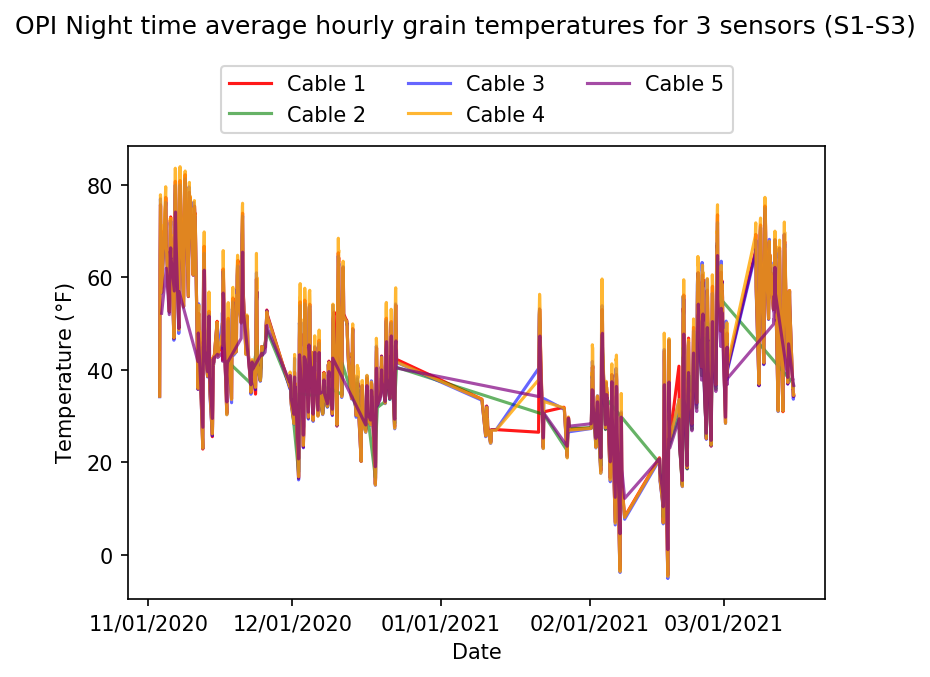

In [26]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1['OPI_DATE'].values, c1['C1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2['OPI_DATE'].values, c2['C2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
line3 = ax.plot(c3['OPI_DATE'].values, c3['C3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
line4 = ax.plot(c4['OPI_DATE'].values, c4['C4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
line5 = ax.plot(c5['OPI_DATE'].values, c5['C5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI Night time average hourly grain temperatures for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI Night time average hourly grain temperatures for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')



In [27]:
# # Moving average daytime
# temp = c1_hour_df.rolling(12).mean()
# c1_mov_avg = c1_hour_df[['OPI_DATE']].copy()
# c1_mov_avg = pd.concat([c1_mov_avg, temp], axis=1)
# c1_mov_avg = c1_mov_avg.dropna()
# c1_mov_avg

In [28]:
# # Moving average daytime c2
# temp = c2_hour_df.rolling(12).mean()
# c2_mov_avg = c2_hour_df[['OPI_DATE']].copy()
# c2_mov_avg = pd.concat([c2_mov_avg, temp], axis=1)
# c2_mov_avg = c2_mov_avg.dropna()
# c2_mov_avg

In [29]:
def get_daily_avg(original_df, time_column, value_column):
    output = []
    current_day = pd.Timestamp(original_df[time_column].values.min())
    current_day = datetime(year=current_day.year, month=current_day.month, day=current_day.day)
    end_date = pd.Timestamp(original_df[time_column].values.max())
    while current_day < end_date:
        
        day_df = original_df[(original_df[time_column] > current_day) & 
       (original_df[time_column] < current_day + timedelta(days=1))]
        output.append({
            time_column: current_day,
            value_column: day_df[value_column].mean()
        })
        current_day = current_day + timedelta(days=1)
    return pd.DataFrame(output, columns=[time_column, value_column])

In [30]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c1_daily_avg = get_daily_avg(c1, 'OPI_DATE', 'C1s-avg')
c1_daily_avg['C1-daily'] = c1_daily_avg['C1s-avg'].copy()
c1_daily_avg = c1_daily_avg.drop(['C1s-avg'], axis=1)
c1_daily_avg = c1_daily_avg.dropna()
c1_daily_avg

,OPI_DATE,C1-daily
0,2020-11-03,63.215152
1,2020-11-04,73.655556
2,2020-11-05,64.033333
3,2020-11-06,68.942424
4,2020-11-07,63.785417
...,...,...
128,2021-03-11,59.663636
129,2021-03-12,54.684848
130,2021-03-13,56.809091
131,2021-03-14,49.254545


In [31]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c2_daily_avg = get_daily_avg(c2, 'OPI_DATE', 'C2s-avg')
c2_daily_avg['C2-daily'] = c2_daily_avg['C2s-avg'].copy()
c2_daily_avg = c2_daily_avg.drop(['C2s-avg'], axis=1)
c2_daily_avg = c2_daily_avg.dropna()
c2_daily_avg

,OPI_DATE,C2-daily
0,2020-11-17,41.633333
5,2020-11-22,39.348485
6,2020-11-23,43.100000
7,2020-11-24,40.918519
8,2020-11-25,47.750000
13,2020-11-30,36.715686
15,2020-12-02,24.591667
19,2020-12-06,34.333333
20,2020-12-07,33.625926
21,2020-12-08,33.633333


In [32]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c3_daily_avg = get_daily_avg(c3, 'OPI_DATE', 'C3s-avg')
c3_daily_avg['C3-daily'] = c3_daily_avg['C3s-avg'].copy()
c3_daily_avg = c3_daily_avg.drop(['C3s-avg'], axis=1)
c3_daily_avg = c3_daily_avg.dropna()
c3_daily_avg

,OPI_DATE,C3-daily
0,2020-11-03,63.269697
1,2020-11-04,72.340000
2,2020-11-05,63.800000
3,2020-11-06,69.578788
4,2020-11-07,63.829167
...,...,...
128,2021-03-11,59.751515
129,2021-03-12,55.636364
130,2021-03-13,57.363636
131,2021-03-14,49.269697


In [33]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c4_daily_avg = get_daily_avg(c4, 'OPI_DATE', 'C4s-avg')
c4_daily_avg['C4-daily'] = c4_daily_avg['C4s-avg'].copy()
c4_daily_avg = c4_daily_avg.drop(['C4s-avg'], axis=1)
c4_daily_avg = c4_daily_avg.dropna()
c4_daily_avg

,OPI_DATE,C4-daily
0,2020-11-03,64.300000
1,2020-11-04,74.206667
2,2020-11-05,64.160606
3,2020-11-06,70.912121
4,2020-11-07,64.968750
...,...,...
128,2021-03-11,60.215152
129,2021-03-12,55.869697
130,2021-03-13,58.148485
131,2021-03-14,49.330303


In [34]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c5_daily_avg = get_daily_avg(c5, 'OPI_DATE', 'C5s-avg')
c5_daily_avg['C5-daily'] = c5_daily_avg['C5s-avg'].copy()
c5_daily_avg = c5_daily_avg.drop(['C5s-avg'], axis=1)
c5_daily_avg = c5_daily_avg.dropna()
c5_daily_avg

,OPI_DATE,C5-daily
0,2020-11-03,52.233333
1,2020-11-04,61.966667
2,2020-11-05,60.090909
3,2020-11-06,68.066667
4,2020-11-07,50.116667
...,...,...
117,2021-02-28,49.733333
118,2021-03-01,39.093939
128,2021-03-11,54.884848
131,2021-03-14,41.626667


In [35]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = c1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['C1_Daily_Average'] = c1_daily_avg[['C1-daily']].copy()
to_be_save_df['C2_Daily_Average'] = c2_daily_avg[['C2-daily']].copy()
to_be_save_df['C3_Daily_Average'] = c3_daily_avg[['C3-daily']].copy()
to_be_save_df['C4_Daily_Average'] = c4_daily_avg[['C4-daily']].copy()
to_be_save_df['C5_Daily_Average'] = c5_daily_avg[['C5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path / 'OPI Night time average daily grain temperatures for 3 sensors.csv')

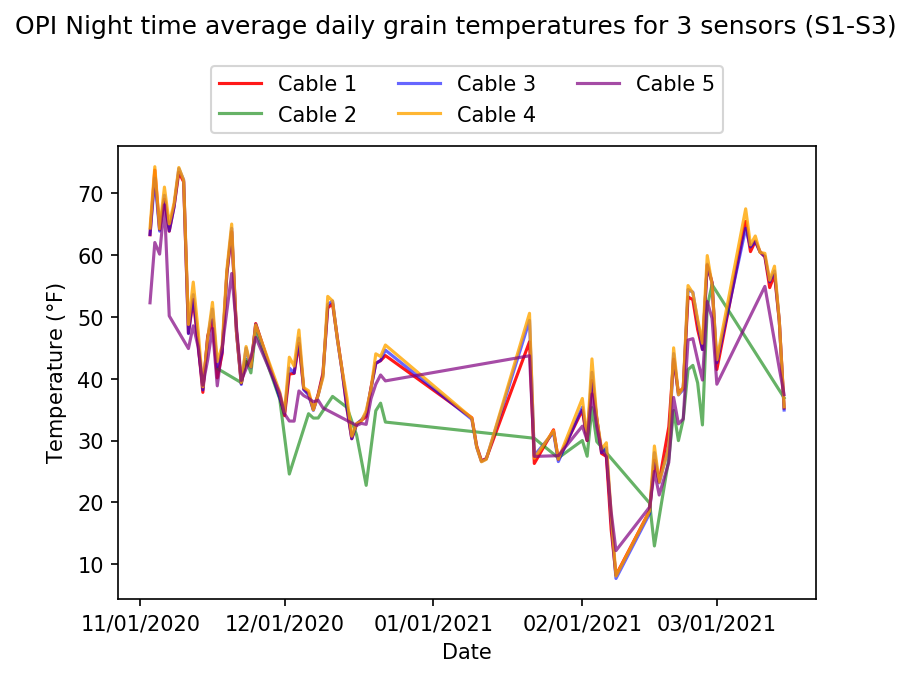

In [36]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1_daily_avg['OPI_DATE'].values, c1_daily_avg['C1-daily'].values, color= 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2_daily_avg['OPI_DATE'].values, c2_daily_avg['C2-daily'].values, color= 'green', label='Cable 2', alpha=0.6)
line3 = ax.plot(c3_daily_avg['OPI_DATE'].values, c3_daily_avg['C3-daily'].values, color= 'blue', label='Cable 3', alpha=0.6)
line4 = ax.plot(c4_daily_avg['OPI_DATE'].values, c4_daily_avg['C4-daily'].values, color= 'orange', label='Cable 4', alpha=0.8)
line5 = ax.plot(c5_daily_avg['OPI_DATE'].values, c5_daily_avg['C5-daily'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI Night time average daily grain temperatures for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI Night time average daily grain temperatures for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

NameError: name 'daytime' is not defined

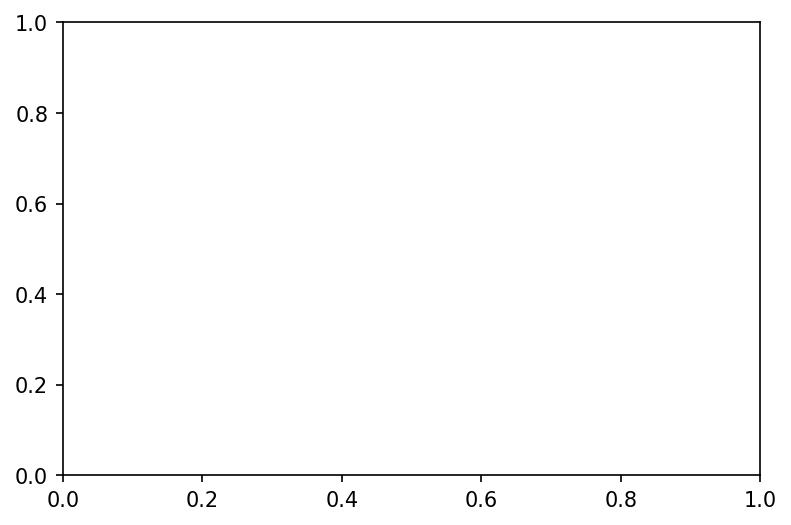

In [37]:
#title, labels and colors for graph
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(daytime['Date'].values, daytime['Temp_Headspace'].values, color= 'red', label='Day_time', alpha=0.5)
line2 = ax.plot(nighttime['Date'].values, nighttime['Temp_Headspace'].values, color= '#189430', label='Night_time', alpha=0.4)
line3 = ax.plot(daytime_mov_avg['Date'].values, daytime_mov_avg['Temp_Headspace'].values, color= 'red', label='Day_time_Moving_Avg (12hrs)')
line4 = ax.plot(nighttime_mov_avg['Date'].values, nighttime_mov_avg['Temp_Headspace'].values, color= '#189430', label='Night_time_Moving_Avg (12hrs)')
# ax.plot(date_grain_df.Date_Grain.to_numpy(), date_grain_df.Grain_Avg_RH.to_numpy(), 'b')
date_form = DateFormatter("%m/%d/%Y")
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
# ax2.set_ylabel('RH (%)')
#Title box and legend
fig.suptitle('Day_and_Night_Time GrainTemp', y=1.1)
ax.set_xlabel('Date')
#ax.set_ylabel('$CO_2$ x 1000 ppm');
#ax2.set_ylabel('Temperature, $\degree$F');
lns = line1 + line2 + line3 + line4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
plt.xlim([datetime(2020, 11, 6), datetime(2021, 3, 20)])
filename = path / 'DayTime_GrainTemp.jpeg'
plt.savefig(filename, bbox_inches='tight')
